In [48]:
import os
import sys
from typing import List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pyBigWig as pbw
import functools
%matplotlib inline 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Configuration

In [21]:
projd = "/projects/ps-renlab2/szu/projects/amb_pairedtag"
peakd = os.path.join(projd, "data", "pairedtag_peak")
ptDNAsa2d = os.path.join(projd, "data", "pairedtag_ann")
ptbigwigd = os.path.join(projd, "data", "ptDNAbam", "bigwig")
epimemd = os.path.join(projd, "09.epimem", "out")

### H3K27me3 on H3K4me1

In [16]:
sc = "326_OPC_NN"
from_m = "H3K27me3"
to_m = "H3K4me1"
ext_sizes = [500, 1500, 2500]

In [11]:
def load_signals(sc: str, from_m: str, to_m: str, ext_sizes: List[int] = [500, 1500, 2000]) -> pd.DataFrame:
    datad = os.path.join(epimemd, f"{from_m}_on_{to_m}")
    prefix = f"{sc}_{from_m}-to-{to_m}"
    ds = [pd.read_csv(os.path.join(datad, f"{prefix}_e{e}.tsv"), sep="\t", header=0) for e in ext_sizes]
    for d in ds:
        d.set_index("name", drop=False, inplace=True)
    r = ds[0].copy()
    for e, d in zip(ext_sizes[1:], ds[1:]):
        colnm = f"{from_m}_e{e}"
        r.insert(r.shape[1], colnm, d.loc[r.index][colnm])
    return r

In [35]:
signals = load_signals(sc, from_m, to_m, ext_sizes)

In [39]:
signals.sort_values(by = f"{from_m}_e{ext_sizes[0]}", 
                    axis=0, ascending = True, inplace = True)

In [40]:
signals

,chrom,startFrom,endTo,name,int10Neglog10qval,strand,foldChangeAtSummit,neglog10pval,neglog10qval,relaSummit,ScorePerMillion,H3K27me3_e500,H3K27me3_e1500,H3K27me3_e2500
name,,,,,,,,,,,,,,
1179_OPC_NN_1-H3K4me1-Male_peak_19315,chr1,182433603,182433810,1179_OPC_NN_1-H3K4me1-Male_peak_19315,46,.,3.30740,5.93005,4.69688,-1,2.046528,0.000000,0.055926,0.045927
1179_OPC_NN_1-H3K4me1-Female_peak_293645,chr9,71891029,71891229,1179_OPC_NN_1-H3K4me1-Female_peak_293645,61,.,4.27732,7.57990,6.14182,-1,3.822110,0.000000,0.013109,0.055972
1179_OPC_NN_1-H3K4me1-Male_peak_135444,chr19,4383321,4385788,1179_OPC_NN_1-H3K4me1-Male_peak_135444,37,.,3.00204,4.94472,3.76247,-1,1.646120,0.000000,0.021461,0.048627
1179_OPC_NN_1-H3K4me1-Male_peak_269242,chr9,55741708,55742389,1179_OPC_NN_1-H3K4me1-Male_peak_269242,70,.,3.83797,8.30360,7.01028,-1,3.114281,0.000000,0.055167,0.119216
1179_OPC_NN_1-H3K4me1-Male_peak_74795,chr13,89987295,89987570,1179_OPC_NN_1-H3K4me1-Male_peak_74795,36,.,2.96787,4.85295,3.67705,-1,1.601630,0.000000,0.122917,0.102051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179_OPC_NN_1-H3K4me1-Male_peak_57891,chr12,56680816,56682403,1179_OPC_NN_1-H3K4me1-Male_peak_57891,443,.,10.37280,46.20800,44.30110,-1,24.201838,11.310249,8.609010,8.049898
1179_OPC_NN_1-H3K4me1-Female_peak_195166,chr4,3938113,3939751,1179_OPC_NN_1-H3K4me1-Female_peak_195166,529,.,12.39880,54.91490,52.96020,-1,26.441480,12.430812,8.402757,6.695546
1179_OPC_NN_1-H3K4me1-Male_peak_208914,chr5,104330655,104332528,1179_OPC_NN_1-H3K4me1-Male_peak_208914,141,.,5.69754,15.61750,14.11880,-1,7.142959,12.781052,7.908861,6.038279


In [15]:
def get_outlier(
    x: np.ndarray, up_quantile: float = 0.995, fold_std: float = 2.0
) -> float:
    q = np.quantile(x, up_quantile)
    print(f"max: {x.max()}; quantile {up_quantile}: {q}.")
    v = x[x <= q]
    m = np.mean(v)
    sd = np.std(v)
    thres = m + fold_std * sd
    print(f"mean: {m}; std: {sd}; threshold: {thres}.")
    print(f"under threshold {thres}, {(x >= thres).sum()} outliers.")
    return thres

In [19]:
threses = [get_outlier(signals[f"{from_m}_e{e}"]) for e in ext_sizes]

max: 22.78635742072772; quantile 0.995: 6.775915753563311.
mean: 1.1545843426787563; std: 1.0243124376213304; threshold: 3.203209217921417.
under threshold 3.203209217921417, 9254 outliers.
max: 14.67578731383889; quantile 0.995: 6.034698680591024.
mean: 1.037004196159207; std: 0.8985116807706485; threshold: 2.834027557700504.
under threshold 2.834027557700504, 9221 outliers.
max: 11.001938409044682; quantile 0.995: 5.791230249893307.
mean: 1.0006688233725745; std: 0.8540810607943462; threshold: 2.708830944961267.
under threshold 2.708830944961267, 9254 outliers.


In [20]:
9221 / signals.shape[0]

0.054130368422288494

In [42]:
signals_to_plot = pd.DataFrame(
    data= {
        'id': list(range(signals.shape[0])) * 3,
        'group': functools.reduce(
            lambda x, y: x +y,
            [[f"{from_m}_e{e}"] * signals.shape[0] for e in ext_sizes]),
        'value': pd.concat([signals[f"{from_m}_e{e}"] for e in ext_sizes])
    }
)

In [43]:
signals_to_plot

,id,group,value
name,,,
1179_OPC_NN_1-H3K4me1-Male_peak_19315,0,H3K27me3_e500,0.000000
1179_OPC_NN_1-H3K4me1-Female_peak_293645,1,H3K27me3_e500,0.000000
1179_OPC_NN_1-H3K4me1-Male_peak_135444,2,H3K27me3_e500,0.000000
1179_OPC_NN_1-H3K4me1-Male_peak_269242,3,H3K27me3_e500,0.000000
1179_OPC_NN_1-H3K4me1-Male_peak_74795,4,H3K27me3_e500,0.000000
...,...,...,...
1179_OPC_NN_1-H3K4me1-Male_peak_57891,170343,H3K27me3_e2500,8.049898
1179_OPC_NN_1-H3K4me1-Female_peak_195166,170344,H3K27me3_e2500,6.695546
1179_OPC_NN_1-H3K4me1-Male_peak_208914,170345,H3K27me3_e2500,6.038279


<Axes: xlabel='id', ylabel='value'>

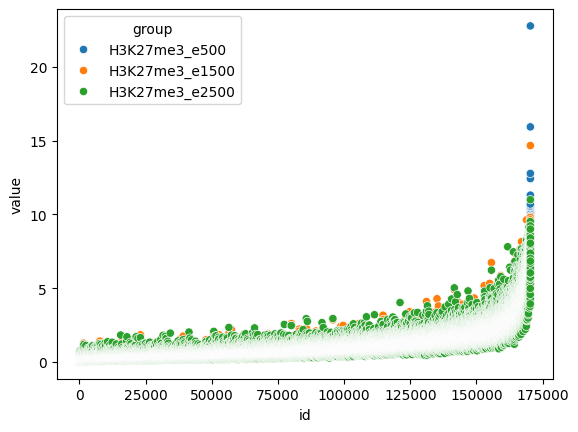

In [50]:
sn.scatterplot(data = signals_to_plot, x = 'id', y = 'value', hue = 'group')
plt.show()

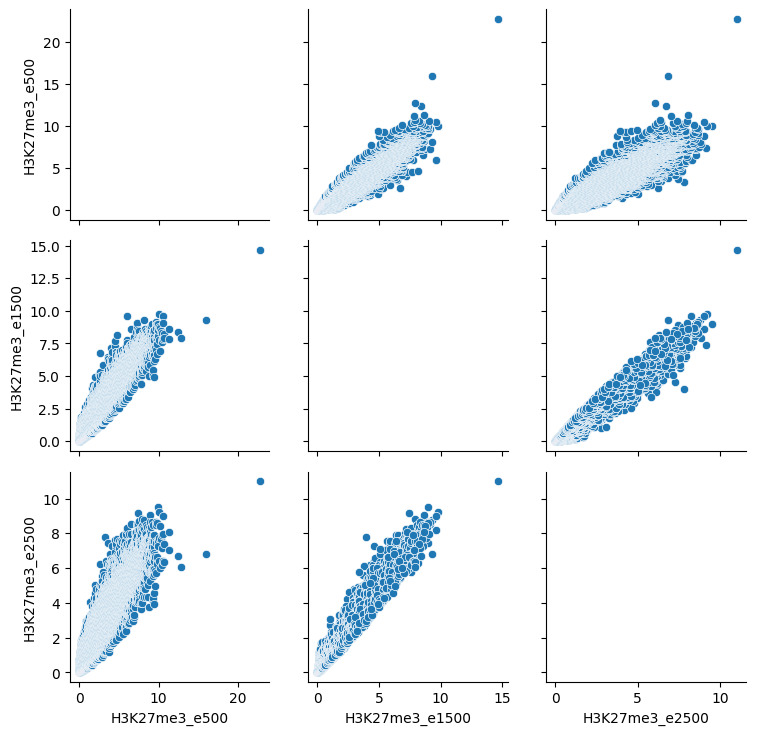

In [56]:
g = sn.PairGrid(signals[[f"{from_m}_e{e}" for e in ext_sizes]])
g.map_offdiag(sn.scatterplot)
g.add_legend()


Text(0.5, 1.0, '326_OPC_NN H3K27me3_on_H3K4me1 with ext_size 500')

Text(0.5, 0, '9254 regions pass threshold 3.203209217921417.')

Text(0.5, 1.0, '326_OPC_NN H3K27me3_on_H3K4me1 with ext_size 1500')

Text(0.5, 0, '9221 regions pass threshold 2.834027557700504.')

Text(0.5, 1.0, '326_OPC_NN H3K27me3_on_H3K4me1 with ext_size 2500')

Text(0.5, 0, '9254 regions pass threshold 2.708830944961267.')

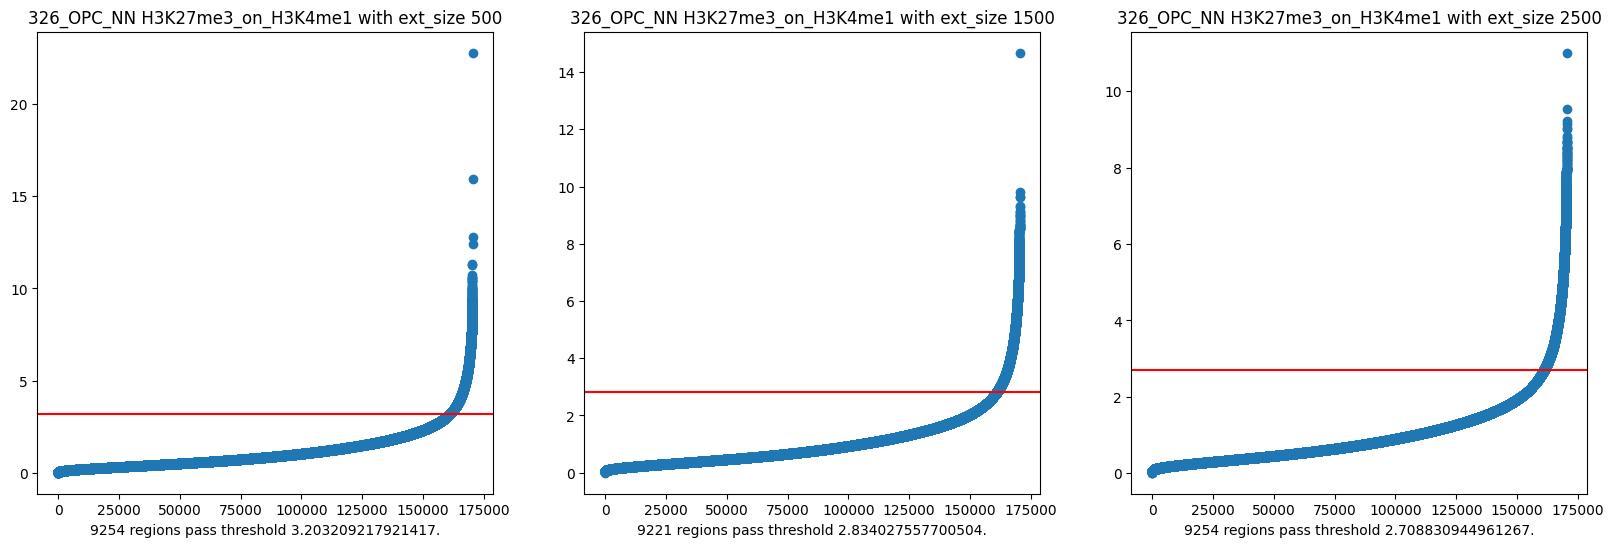

In [64]:
fig, axes = plt.subplots(ncols = len(ext_sizes), nrows = 1, figsize = (20, 6))
for i, e in enumerate(ext_sizes):
    group = f"{from_m}_e{e}"
    y = signals[group].sort_values()
    t = threses[i]
    axes[i].scatter(x = range(signals.shape[0]), y = y)
    axes[i].set_title(f"{sc} {from_m}_on_{to_m} with ext_size {e}")
    axes[i].axhline(t, color = 'red')
    axes[i].set_xlabel(f"{(y > t).sum()} regions pass threshold {t}.")